<a href="https://colab.research.google.com/github/eloiza-dias/artigo_imagens_microsc/blob/main/Correla%C3%A7%C3%A3o_A549.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlação

Para essa análise, eu preciso conferir se existe uma relação entre os valores previstos (modelo) com os valores que eu sei (y). Se essa relação é positiva ou negativa.

### Organização das bibliotecas

In [ ]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#organizando os arquivos de forma aleatória
import random
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg
# Math
from math import ceil

In [ ]:
pip install util-gfsilveira

In [ ]:
#modelo de revisão redes neurais - cnn
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
#from keras.utils import to_categorical
from util import meus_uteis, timeProcess, mask_corr_graphic, printLis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
from keras.models import load_model

### Modelo de regressão A549 - MENOR ERRO

In [ ]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens
modelo_teste = load_model('/content/drive/MyDrive/1_Informações_scripts/model__A549_regressao_menor_erro2022-1-26.h5')
modelo_teste

### Dados necessários para obter X_teste

In [ ]:
#Importando as imagnes que foram salvas para treinar e testar o modelo quando foram separadas usando train_test_split
X_test_menor_erro = joblib.load('/content/drive/MyDrive/1_Informações_scripts/2_images_de_X_test_a549_melhor_modelo2022-1-26.gz') #carregando arquivo
X_test_menor_erro.shape #30% das imagens que foram salvas para testar o modelo

(341, 200, 200, 3)

In [ ]:
#Importando os rótulos de cada imagem - número de células para cada imagem
y_test_menor_erro = joblib.load('/content/drive/MyDrive/1_Informações_scripts/2_images_de_y_test_a549_melhor_modelo2022-1-26.gz')
y_test_menor_erro.shape #30% dos rótulos que foram salvos das imagens

(341,)

### Obtendo os valores de X_test para criar lista de dados previstos

In [ ]:
dados_prev = modelo_teste.predict(X_test_menor_erro) #usando a função predict para obter os valores das imagens de X_test
lista_previsto_menor_erro = dados_prev.flatten().tolist() #criando uma lista com valores e retirando as listas dentro de listas (comuns em arrays)
# lista_previsto_menor_erro

### Valores dos dados observados

In [ ]:
lista_observado_menor_erro = list(y_test_menor_erro) #Salvando os rótulos que estavam em único array em uma lista
len(lista_observado_menor_erro)

341

### Criando a dataframe para organizar as listas dos valores

In [ ]:
import pandas as pd #Chamando pandas para criar Dataframe
from scipy.stats.stats import pearsonr as stats #importando a biblioteca para gráfico de correlação


In [ ]:
#criando um dataframe para organizar os dados de cada lista criada
df = pd.DataFrame(zip(lista_observado_menor_erro,lista_previsto_menor_erro), columns = ['Valores observados','Lista preditos']) #criando as colunas que vão receber as listas
df.head() #chamando a dataframe

,Valores observados,Lista preditos
0,466,419.284546
1,944,908.155945
2,455,481.459656
3,539,556.850159
4,874,751.374023


In [ ]:
#Precisava do dado arrendodado, já que era muito extenso, então foi criada uma nova coluna com esses valores e adicionado ao df
teste = round(df['Lista preditos'],2) #arredondando
df['Valores preditos'] = teste #criando a coluna
df.head()

,Valores observados,Lista preditos,Valores preditos
0,466,419.284546,419.28
1,944,908.155945,908.16
2,455,481.459656,481.46
3,539,556.850159,556.85
4,874,751.374023,751.37


In [ ]:
#alternando a ordem das colunas da Dataframe para melhor organizar
df = df.reindex(columns=['Valores observados','Valores preditos','Lista preditos'])
df.head()

,Valores observados,Valores preditos,Lista preditos
0,466,419.28,419.284546
1,944,908.16,908.155945
2,455,481.46,481.459656
3,539,556.85,556.850159
4,874,751.37,751.374023


In [ ]:
#Chamando apenas os dados maiores 300 células
df_300 = df[df['Valores observados'] > 300]


In [ ]:
len(df_300)

245

### Gráfico de Correlação Pearson

<Figure size 1080x1080 with 0 Axes>

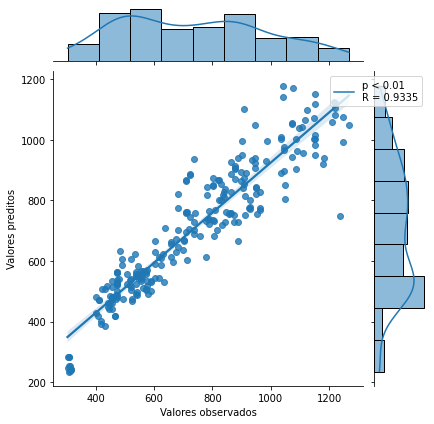

In [ ]:
col1_obt = 0 #chamando a primeira coluna
col2_prev = 1 #chamando a segunda coluna
pear_pos_menor_erro = stats(df_300[df_300.columns[col1_obt]], df_300[df_300.columns[col2_prev]]) #calculando a correlação entre as duas colunas selecionadas
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.figure(figsize=(15,15))
sns.jointplot(
    x=df_300.columns[col1_obt], #Em x recebe os dados obtidos (rótulos)
    y=df_300.columns[col2_prev], #Em y recebe os valores previstos (imagens)
    kind='reg',
    data=df_300
)

if pear_pos_menor_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_menor_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(pear_pos_menor_erro[1]) + '\nR = ' + str(round(pear_pos_menor_erro[0], 4))]) #calculando p e r





# if print_fig == 1:
#     plt.savefig("results\\Corr_"+df.columns[campo_select]+""+str(exp)+""+df.columns[col1]+"-"+df.columns[col2]+".jpg", dpi=600)


In [ ]:
# pear_pos_menor_erro

In [ ]:
pear_pos_menor_erro[1]
if pear_pos_menor_erro[1] < 0.01:
  print('Sim, é inferior')
else:
  print('Não é inferior')

Sim, é inferior


### Modelo de regressão A549 - MAIOR ERRO (menor numero de imagens)

In [ ]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens
modelo_maior_erro = load_model('/content/drive/MyDrive/1_Informações_scripts/model__A549_regressao_maior_erro2022-1-26.h5')
modelo_maior_erro

In [ ]:
#Importando as imagens que foram salvas para treinar e testar o modelo quando foram separadas usando train_test_split
X_test_maior_erro = joblib.load('/content/drive/MyDrive/1_Informações_scripts/2_images_de_X_test_a549_pior_modelo.gz') #carregando arquivo
X_test_maior_erro.shape

(53, 200, 200, 3)

In [ ]:
#Importando os rótulos que foram salvas para treinar e testar o modelo quando foram separadas usando train_test_split
y_test_maior_erro = joblib.load('/content/drive/MyDrive/1_Informações_scripts/2_images_de_y_test_a549_pior_modelo.gz') #carregando arquivo
y_test_maior_erro.shape

(53,)

In [ ]:
lista_observado_maior_erro = list(y_test_maior_erro)
# lista_observado

In [ ]:
dados_prev = modelo_maior_erro.predict(X_test_maior_erro)
lista_previsto_maior_erro = dados_prev.flatten().tolist()
len(lista_previsto_maior_erro)

53

In [ ]:
df_maior_erro = pd.DataFrame(zip(lista_observado_maior_erro,lista_previsto_maior_erro), columns = ['Valores observados','Lista preditos'])
df_maior_erro.head()

,Valores observados,Lista preditos
0,963,1038.746582
1,841,1118.528809
2,821,1000.504700
3,876,1115.380127
4,944,837.640930


In [ ]:
teste = round(df_maior_erro['Lista preditos'],2)
df_maior_erro['Valores preditos'] = teste
df_maior_erro.head()

,Valores observados,Lista preditos,Valores preditos
0,963,1038.746582,1038.75
1,841,1118.528809,1118.53
2,821,1000.504700,1000.50
3,876,1115.380127,1115.38
4,944,837.640930,837.64


In [ ]:
df = df.reindex(columns=['Valores observados','Valores preditos','Lista preditos'])
df_maior_erro.head()

,Valores observados,Lista preditos,Valores preditos
0,963,1038.746582,1038.75
1,841,1118.528809,1118.53
2,821,1000.504700,1000.50
3,876,1115.380127,1115.38
4,944,837.640930,837.64


In [ ]:
from scipy.stats.stats import spearmanr as spearman #importando a biblioteca para gráfico de correlação


<Figure size 1080x1080 with 0 Axes>

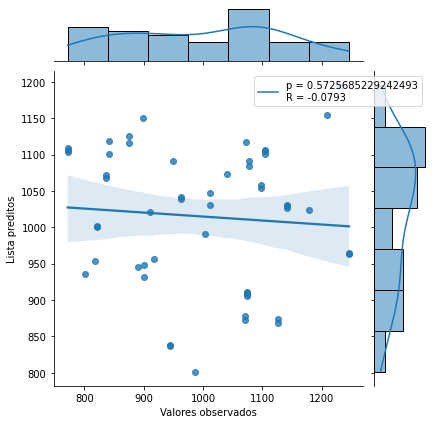

In [ ]:
col1_obt = 0
col2_prev = 1
pear_pos_maior_erro = spearman(df_maior_erro[df_maior_erro.columns[col1_obt]], df_maior_erro[df_maior_erro.columns[col2_prev]])
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(15,15))

sns.jointplot(
    x=df_maior_erro.columns[col1_obt],
    y=df_maior_erro.columns[col2_prev],
    kind='reg',
    data=df_maior_erro
)
#plt.title('Correlação dados observados x dados previstos ')
plt.xlabel('test')
plt.ylabel('test')

if pear_pos_maior_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(pear_pos_maior_erro[1]) + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e r


# plt.legend([
#     'p = ' + str(pear_pos[1]) + '\nR = ' + str(round(pear_pos[0], 5))])

# plt.title('Correlação dados observados x dados previstos ')
# plt.xlabel('Valores previstos')
# plt.ylabel('Valores observados')
# if print_fig == 1:
#     plt.savefig("results\\Corr_"+df.columns[campo_select]+""+str(exp)+""+df.columns[col1]+"-"+df.columns[col2]+".jpg", dpi=600)

In [ ]:
pear_pos_maior_erro[1]
if pear_pos_maior_erro[1] < 0.01:
  print('Sim, é inferior')
else:
  print('Não é inferior')

NameError: ignored